# Project Title: Analyze the Popularity of Programming Languages
## Author: Haseeb
## Objective: 
The goal of this project is to analyze stack_overflow_data Dataset to Analyze the Popularity of Programming Languages. 

### Key Questions to Answer:
1. What was the percentage of R questions for 2020?
2. Identify the five programming language tags with the highest total number of questions asked between 2015 and 2020 (inclusive)?

In [1]:
import pandas as pd     # For data manipulation
import numpy as np      # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns   # For advanced visualization

# This line ensures your charts show up inside the notebook
%matplotlib inline

## Data Loading

In [2]:
df = pd.read_csv('stack_overflow_data.csv')  # Load your dataset

In [3]:
print(df.head(10))  # Display the first few rows of the dataframe

   year                  tag  num_questions  year_total
0  2008             treeview             69      168541
1  2008      scheduled-tasks             30      168541
2  2008       specifications             21      168541
3  2008            rendering             35      168541
4  2008            http-post              6      168541
5  2008        static-assert              1      168541
6  2008         asp.net-ajax            159      168541
7  2008  collision-detection             10      168541
8  2008              systray              4      168541
9  2008          html-helper             20      168541


In [4]:
print(df.tail(10))  # Display the last few rows of the dataframe

        year                 tag  num_questions  year_total
420056  2020       xmltextreader              1     5452545
420057  2020           ui-scroll              2     5452545
420058  2020        timageviewer              1     5452545
420059  2020        asterisk-ael              1     5452545
420060  2020             haxelib              1     5452545
420061  2020     database-engine              4     5452545
420062  2020    login-automation              1     5452545
420063  2020               sense              2     5452545
420064  2020          lua-busted              1     5452545
420065  2020  installshield-2016              1     5452545


## Data Inspection

In [5]:
print('Summary of the DataFrame:')
print(df.info())  # Get a summary of the dataframe

Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420066 entries, 0 to 420065
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   year           420066 non-null  int64 
 1   tag            420040 non-null  object
 2   num_questions  420066 non-null  int64 
 3   year_total     420066 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 12.8+ MB
None


In [6]:
print('Missing Values in Each Column:')
print(df.isnull().sum())  # Check for missing values in each column

print('\n\nTotal rows with missing values:')
print(df.isnull().any(axis=1).sum())  # Total rows with any missing values

Missing Values in Each Column:
year              0
tag              26
num_questions     0
year_total        0
dtype: int64


Total rows with missing values:
26


In [7]:
print('Sample of missing rows:')
print(df[df.isnull().any(axis=1)].head(10))  # Display a sample of rows with missing values

Sample of missing rows:
        year  tag  num_questions  year_total
1745    2008  NaN              4      168541
3689    2008  NaN             75      168541
14116   2009  NaN            377      981124
18991   2009  NaN             28      981124
31648   2010  NaN            735     1970729
38922   2010  NaN             46     1970729
71635   2011  NaN           1079     3473395
73282   2011  NaN             88     3473395
100223  2012  NaN           1355     4787010
102061  2012  NaN            166     4787010


In [8]:

print('Shape of the DataFrame:')
print(df.shape)  # Get the dimensions of the dataframe

Shape of the DataFrame:
(420066, 4)


In [9]:
print('Statistical Summary of Numerical Columns:')
print(df.describe())  # Get statistical summary of numerical columns

Statistical Summary of Numerical Columns:
                year  num_questions    year_total
count  420066.000000  420066.000000  4.200660e+05
mean     2015.132601     142.557336  5.222995e+06
std         3.411208    2355.220337  1.679353e+06
min      2008.000000       1.000000  1.685410e+05
25%      2012.000000       2.000000  4.787010e+06
50%      2015.000000       7.000000  5.621997e+06
75%      2018.000000      29.000000  6.431458e+06
max      2020.000000  264379.000000  6.612772e+06


## Data Cleaning

In [10]:
df.dropna(subset=['tag'] ,inplace=True)  # Drop rows where 'tag' is missing
print('After dropping rows with missing "tag":')
print(df.isnull().sum())  # Check for missing values in each column after dropping

After dropping rows with missing "tag":
year             0
tag              0
num_questions    0
year_total       0
dtype: int64


## EDA (Exploratory Analysis)

### Question: What was the percentage of R questions for 2020?

In [11]:
print('Question: What was the percentage of R questions for 2020?\n\n')

df_with_percentage = df.copy()  # Create a copy of the dataframe to avoid modifying the original
df_with_percentage['questions_percentage(%)'] = df_with_percentage['num_questions'] / df_with_percentage['year_total'] * 100

print(df_with_percentage.head())  # Display the first few rows to verify the new column

r_2020_percentage = df_with_percentage[(df_with_percentage['tag'] == 'r') & (df_with_percentage['year'] == 2020)]['questions_percentage(%)'].values[0]
print(f'\n\nPercentage of R questions in 2020: {r_2020_percentage:.2f}%')

Question: What was the percentage of R questions for 2020?


   year              tag  num_questions  year_total  questions_percentage(%)
0  2008         treeview             69      168541                 0.040940
1  2008  scheduled-tasks             30      168541                 0.017800
2  2008   specifications             21      168541                 0.012460
3  2008        rendering             35      168541                 0.020766
4  2008        http-post              6      168541                 0.003560


Percentage of R questions in 2020: 0.97%


### Result: Percentage of R questions in 2020: 0.97%

### Question: Identify the five programming language tags with the highest total number of questions asked between 2015 and 2020 (inclusive)?

In [12]:
print('Question: Identify the five programming language tags with the highest total number of questions asked between 2015 and 2020 (inclusive)?')

df_year_filtered = df[(df['year'] >= 2015) & (df['year'] <= 2020)].copy() # Filter for years 2015-2020

df_tag_total = df_year_filtered.groupby('tag')['num_questions'].sum().reset_index()  # Group by 'tag' and sum 'num_questions'

top_5_tags = df_tag_total.sort_values(ascending=False, by='num_questions').head(5)  # Sort and get top 5 tags

print('\n\nFive programming language tags with the highest total number of questions (2015-2020):')
print(top_5_tags)

Question: Identify the five programming language tags with the highest total number of questions asked between 2015 and 2020 (inclusive)?


Five programming language tags with the highest total number of questions (2015-2020):
              tag  num_questions
24889  javascript        1373634
39722      python        1187838
24724        java         982747
1528      android         737330
6987           c#         730045


### Result: Five programming language tags with the highest total number of questions (2015-2020):
    tag         num_questions
    javascript  1373634
    python      1187838
    java        982747
    android     737330
    c#          730045

## Visualization

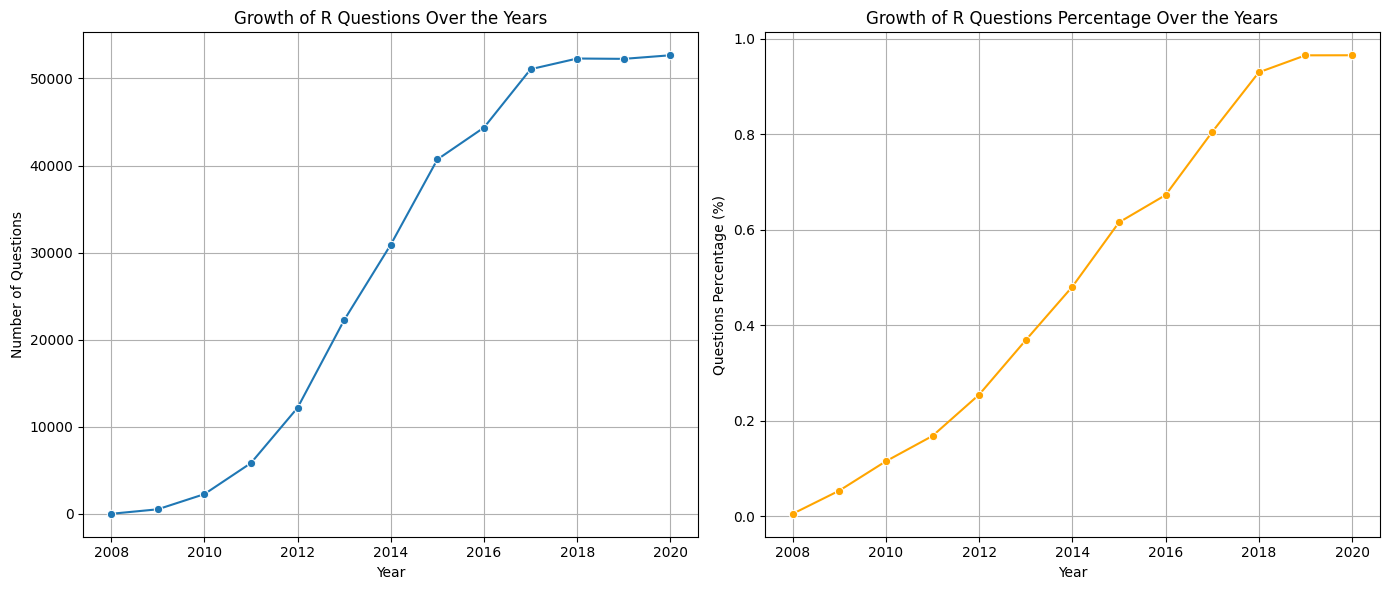

In [13]:
#Two Graphs:
#First shows the growth of R questions over the years
#Second shows the growth of R questions percentage over the years

df_r = df_with_percentage[df_with_percentage['tag'] == 'r']  # Filter for R tag

plt.figure(figsize=(14, 6)) # It means the figure size is 14 inches wide and 6 inches tall

plt.subplot(1, 2, 1) # Indicates a 1-row, 2-column grid, and this is the first subplot
sns.lineplot(data=df_r, x='year', y='num_questions', marker='o')
plt.grid(True)
plt.title('Growth of R Questions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Questions')

plt.subplot(1, 2, 2) # Indicates a 1-row, 2-column grid, and this is the second subplot
sns.lineplot(data=df_r, x='year', y='questions_percentage(%)', marker='o', color='orange')
plt.grid(True)
plt.title('Growth of R Questions Percentage Over the Years')
plt.xlabel('Year')
plt.ylabel('Questions Percentage (%)')
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

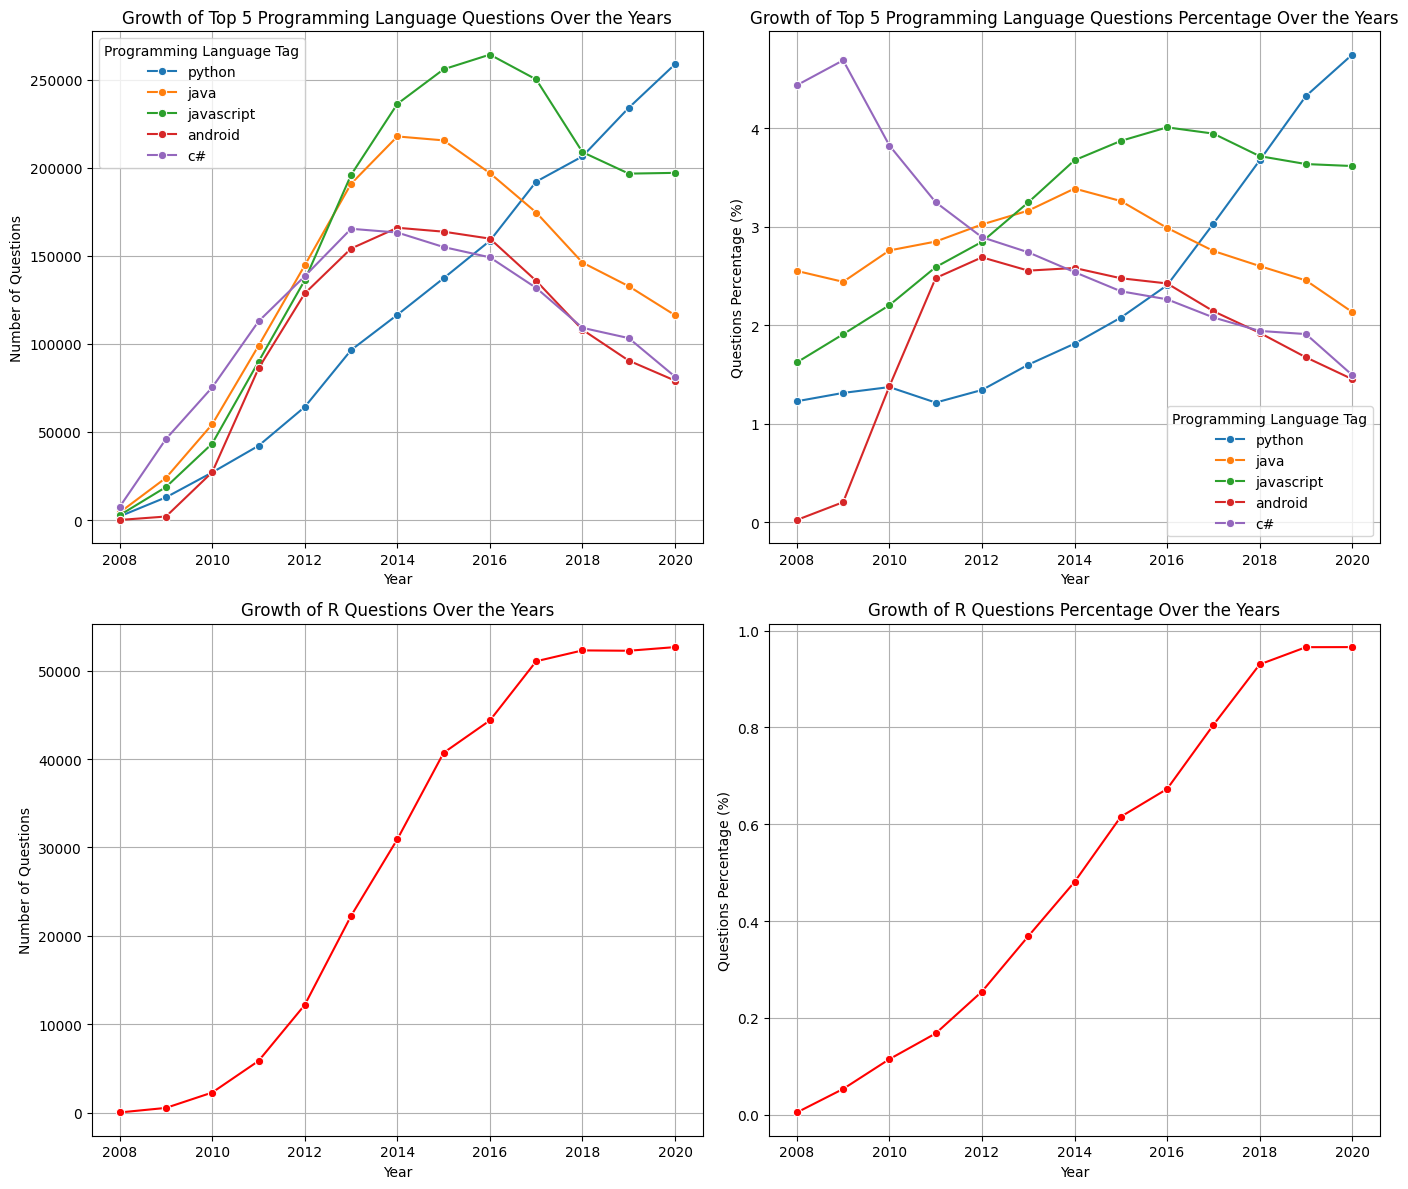

In [14]:
#Four Graphs (Visalizing the growth of top 5 programming languages and R):
#First shows the growth of top 5 programming language questions over the years
#Second shows the growth of top 5 programming language questions percentage over the years
#Third shows the growth of R questions over the years
#Fourth shows the growth of R questions percentage over the years

top_5_tags_list = top_5_tags['tag'].tolist()  # Get the list of top 5 tags
df_top_5 = df_with_percentage[df_with_percentage['tag'].isin(top_5_tags_list)]  # Filter for top 5 tags

plt.figure(figsize=(14, 12)) # It means the figure size is 14 inches wide and 12 inches tall

plt.subplot(2, 2, 1) # Indicates a 2-row, 2-column grid, and this is the first subplot
sns.lineplot(data=df_top_5, x='year', y='num_questions', hue='tag', marker='o', palette='tab10')
plt.grid(True)
plt.title('Growth of Top 5 Programming Language Questions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.legend(title='Programming Language Tag')

plt.subplot(2, 2, 2) # Indicates a 2-row, 2-column grid, and this is the second subplot
sns.lineplot(data=df_top_5, x='year', y='questions_percentage(%)', hue='tag', marker='o', palette='tab10')
plt.grid(True)
plt.title('Growth of Top 5 Programming Language Questions Percentage Over the Years')
plt.xlabel('Year')
plt.ylabel('Questions Percentage (%)')
plt.legend(title='Programming Language Tag')

plt.subplot(2, 2, 3) # Indicates a 2-row, 2-column grid, and this is the third subplot
sns.lineplot(data=df_r, x='year', y='num_questions', marker='o', color='red')
plt.grid(True)
plt.title('Growth of R Questions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Questions')

plt.subplot(2, 2, 4) # Indicates a 2-row, 2-column grid, and this is the fourth subplot
sns.lineplot(data=df_r, x='year', y='questions_percentage(%)', marker='o', color='red')
plt.grid(True)
plt.title('Growth of R Questions Percentage Over the Years')
plt.xlabel('Year')
plt.ylabel('Questions Percentage (%)')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

## Conclusion

## Summary of Findings: Stack Overflow Trends (2015-2020)

After analyzing over 420,066 rows of Stack Overflow tag data, the following insights were uncovered:

1. **Data Quality**: The dataset was largely clean, with only 26 missing values (0.006%) in the 'tag' column, which were removed to ensure accuracy.
2. **Top Performers**: Between 2015 and 2020, the five programming languages with the highest total volume of questions were:
   * Javascript
   * Python
   * Java
   * Android
   * C#
3. **R**: In 2020, questions related to the 'R' programming language accounted for approximately **0.97%** of the total questions asked that year.

**Conclusion**: This analysis answers the questions to analyze the popularity of programming languages.